In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
rawDataSensor1 = pd.read_csv('feeds_sensor_1.csv')
rawDataSensor2 = pd.read_csv('feeds_sensor_2.csv')
refData = pd.read_csv('Aero_12_10_23_to_16_10_23_pm.csv')

rawDataSensor1 = rawDataSensor1.drop(['field1','field2','latitude','longitude','entry_id','elevation','status'], axis=1) 
rawDataSensor2 = rawDataSensor2.drop(['field1','field2','latitude','longitude','entry_id','elevation','status'], axis=1) 
refData = refData.drop([' Monitor ID', ' Location ID'], axis=1) 

refData[' PM2.5(ppm)'] = 1000*refData[' PM2.5(ppm)']
refData[' PM10(ppm)'] = 1000*refData[' PM10(ppm)']


print("Sensor 1 data: ")
print(rawDataSensor1.head())
print("Sensor 2 data: ")
print(rawDataSensor2.head())
print("Reference data: ")
print(refData.head())


Sensor 1 data: 
                  created_at  field3  field4
0  2023-10-10T16:57:04+05:30     0.0     0.0
1  2023-10-10T16:58:06+05:30    11.0    12.0
2  2023-10-10T16:59:07+05:30    12.0    13.0
3  2023-10-10T17:00:08+05:30    12.0    13.0
4  2023-10-10T17:01:07+05:30     0.0     0.0
Sensor 2 data: 
                  created_at  field3  field4
0  2023-10-10T17:04:05+05:30     0.0     0.0
1  2023-10-10T17:05:06+05:30    55.0    62.0
2  2023-10-10T17:06:07+05:30    56.0    63.0
3  2023-10-10T17:07:08+05:30    55.0    62.0
4  2023-10-10T17:09:27+05:30    56.0    62.0
Reference data: 
           Date Time   PM10(ppm)   PM2.5(ppm)
0  13 Oct 2023 22:44       129.0         64.0
1  13 Oct 2023 22:45       127.0         64.0
2  13 Oct 2023 22:46       139.0         67.0
3  13 Oct 2023 22:47       130.0         63.0
4  13 Oct 2023 22:48       138.0         67.0


In [3]:
rawDataSensor1['created_at'] = pd.to_datetime(rawDataSensor1['created_at'])
rawDataSensor2['created_at'] = pd.to_datetime(rawDataSensor2['created_at'])
refData['Date Time'] = pd.to_datetime(refData['Date Time'])

refData['Date Time'] = refData['Date Time'].apply(lambda x: x.isoformat()+"+05:30")
refData['Date Time'] = pd.to_datetime(refData['Date Time'])

rawDataSensor1 = rawDataSensor1.set_index('created_at')
rawDataSensor2 = rawDataSensor2.set_index('created_at')
refData = refData.set_index('Date Time')


print("Sensor 1 data: ")
print(rawDataSensor1.head())
print("Sensor 2 data: ")
print(rawDataSensor2.head())
print("Reference data: ")
print(refData.head())


Sensor 1 data: 
                           field3  field4
created_at                               
2023-10-10 16:57:04+05:30     0.0     0.0
2023-10-10 16:58:06+05:30    11.0    12.0
2023-10-10 16:59:07+05:30    12.0    13.0
2023-10-10 17:00:08+05:30    12.0    13.0
2023-10-10 17:01:07+05:30     0.0     0.0
Sensor 2 data: 
                           field3  field4
created_at                               
2023-10-10 17:04:05+05:30     0.0     0.0
2023-10-10 17:05:06+05:30    55.0    62.0
2023-10-10 17:06:07+05:30    56.0    63.0
2023-10-10 17:07:08+05:30    55.0    62.0
2023-10-10 17:09:27+05:30    56.0    62.0
Reference data: 
                            PM10(ppm)   PM2.5(ppm)
Date Time                                         
2023-10-13 22:44:00+05:30       129.0         64.0
2023-10-13 22:45:00+05:30       127.0         64.0
2023-10-13 22:46:00+05:30       139.0         67.0
2023-10-13 22:47:00+05:30       130.0         63.0
2023-10-13 22:48:00+05:30       138.0         67.0


In [4]:
rawDataSensor1 = rawDataSensor1.resample('1T').mean()
rawDataSensor2 = rawDataSensor2.resample('1T').mean()

rawDataSensor2.interpolate(method='linear', inplace=True)

rawDataSensor1 = rawDataSensor1.loc[str(refData.index[0]):str(refData.index[-1])]
rawDataSensor2 = rawDataSensor2.loc[str(refData.index[0]):str(refData.index[-1])]
refData = refData.loc[str(rawDataSensor1.index[0]):str(rawDataSensor1.index[-1])]   

print("Sensor 1 data: ")
print(rawDataSensor1.tail())
print("Sensor 2 data: ")
print(rawDataSensor2.tail())
print("Reference data: ")
print(refData.tail())

Sensor 1 data: 
                           field3  field4
created_at                               
2023-10-15 15:42:00+05:30     6.0     6.0
2023-10-15 15:43:00+05:30     6.0     6.0
2023-10-15 15:44:00+05:30     6.0     6.0
2023-10-15 15:45:00+05:30     6.0     6.0
2023-10-15 15:46:00+05:30     6.0     6.0
Sensor 2 data: 
                           field3  field4
created_at                               
2023-10-15 15:42:00+05:30    48.0    53.0
2023-10-15 15:43:00+05:30    48.0    54.0
2023-10-15 15:44:00+05:30    48.0    53.0
2023-10-15 15:45:00+05:30    48.0    54.0
2023-10-15 15:46:00+05:30    47.0    53.0
Reference data: 
                            PM10(ppm)   PM2.5(ppm)
Date Time                                         
2023-10-15 15:42:00+05:30       138.0         68.0
2023-10-15 15:43:00+05:30       129.0         68.0
2023-10-15 15:44:00+05:30       125.0         65.0
2023-10-15 15:45:00+05:30       133.0         70.0
2023-10-15 15:46:00+05:30       131.0         68.0


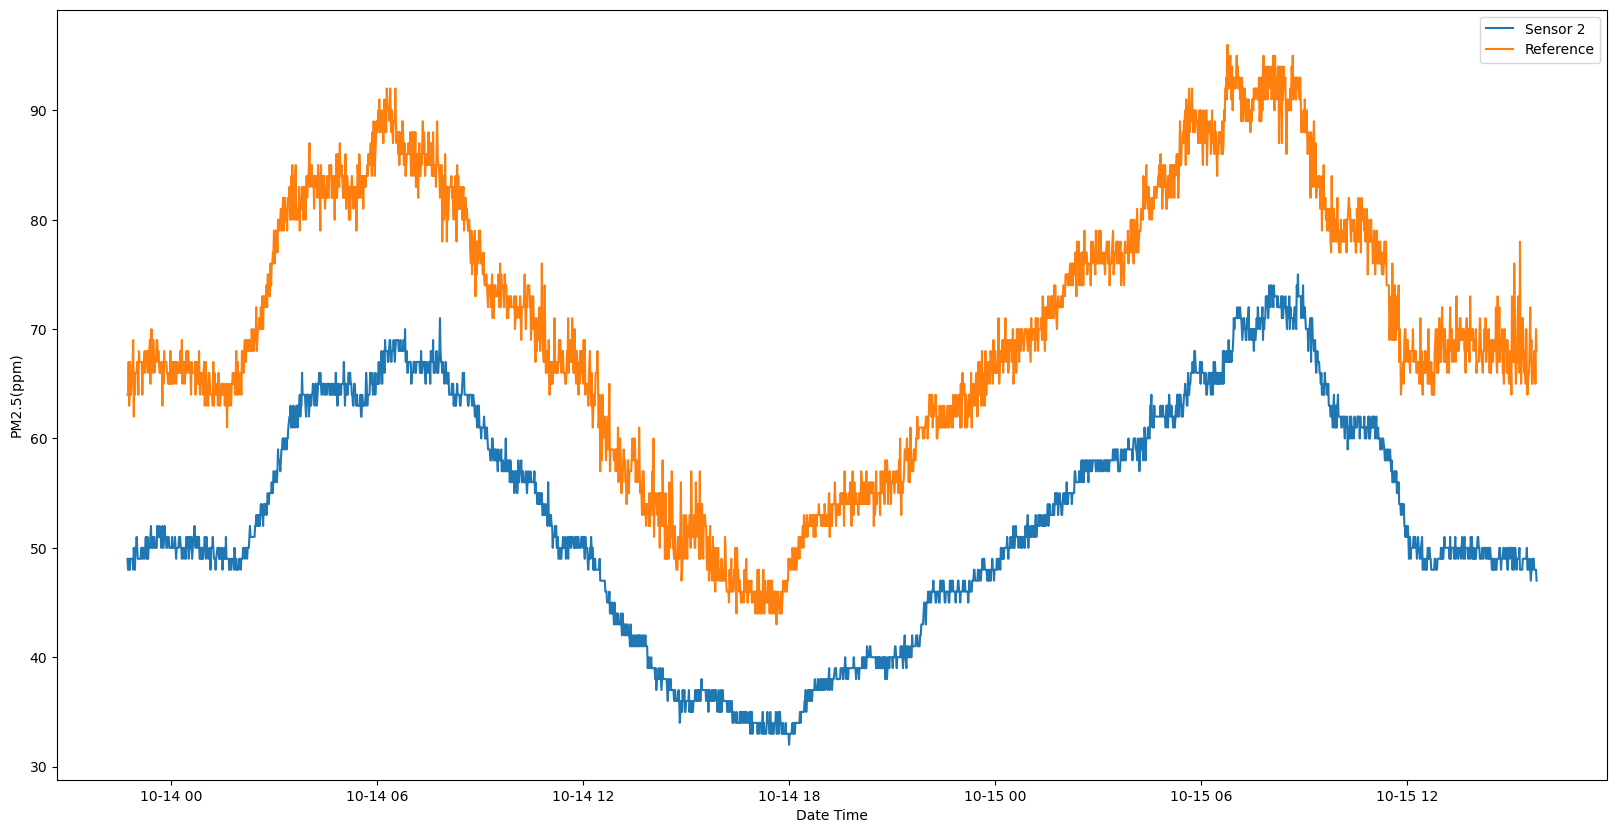

In [5]:
plt.figure(figsize=(20,10))
# plt.plot(rawDataSensor1.index, rawDataSensor1['field3'], label='Sensor 1')
plt.plot(rawDataSensor2.index, rawDataSensor2['field3'], label='Sensor 2')
plt.plot(refData.index, refData[' PM2.5(ppm)'], label='Reference')
plt.xlabel('Date Time')
plt.ylabel('PM2.5(ppm)')
plt.legend()
plt.show()

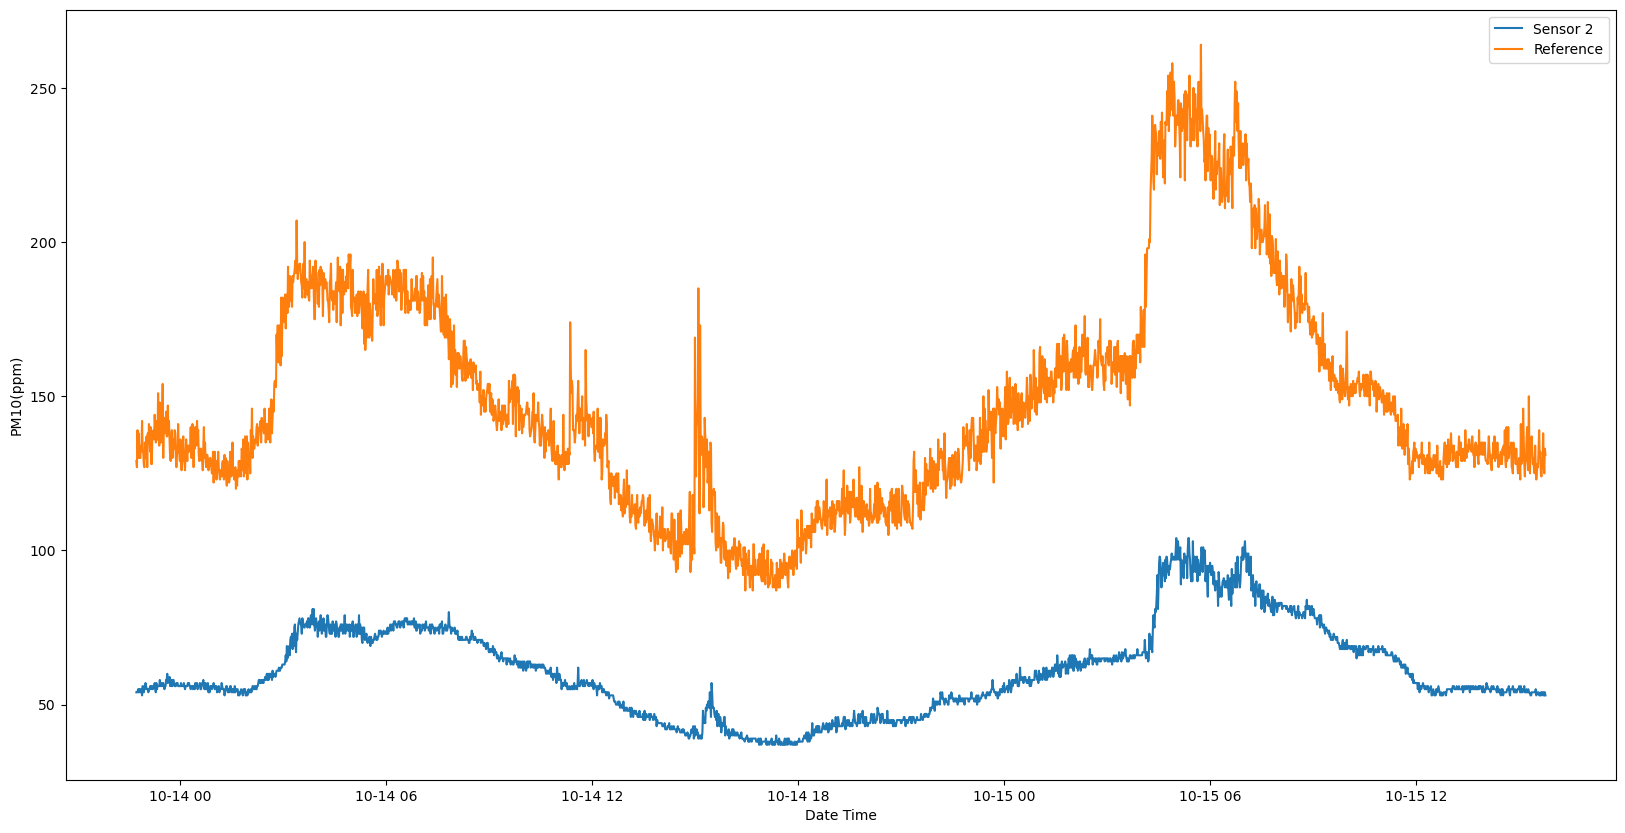

In [6]:
plt.figure(figsize=(20,10))
# plt.plot(rawDataSensor1.index, rawDataSensor1['field4'], label='Sensor 1')
plt.plot(rawDataSensor2.index, rawDataSensor2['field4'], label='Sensor 2')
plt.plot(refData.index, refData[' PM10(ppm)'], label='Reference')
plt.xlabel('Date Time')
plt.ylabel('PM10(ppm)')
plt.legend()
plt.show()

In [7]:
X = rawDataSensor2['field3'].values.reshape(-1,1)
y = refData[' PM2.5(ppm)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print("Slope for PM2.5: ", reg.coef_[0][0])
print("Intercept for PM2.5: ", reg.intercept_[0])

pm25slope = reg.coef_[0][0]
pm25intercept = reg.intercept_[0]

Slope for PM2.5:  1.1623788719513894
Intercept for PM2.5:  8.798736057025366


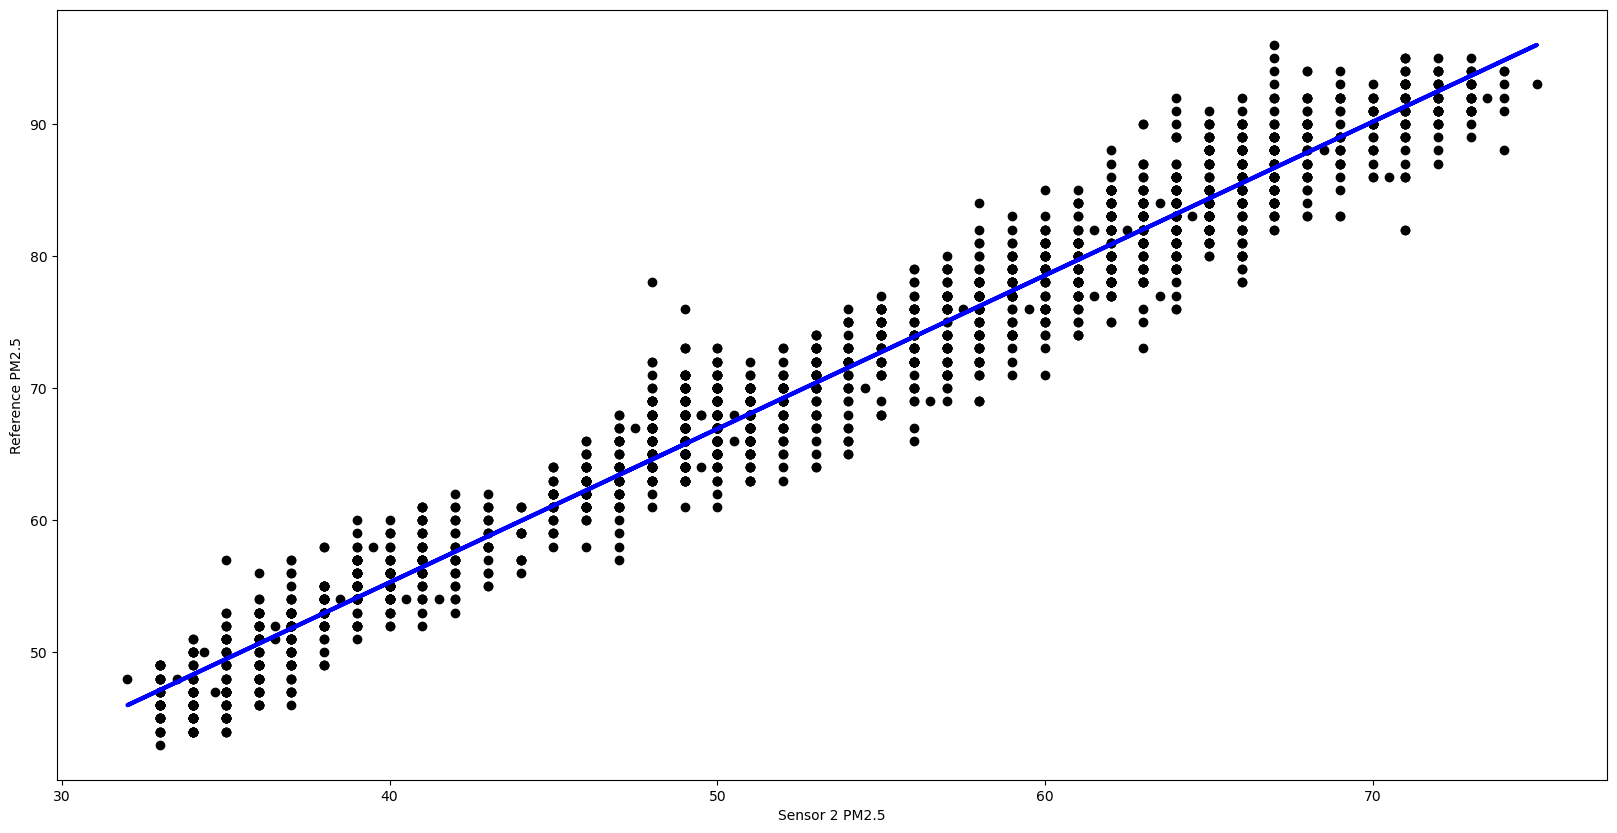

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(X, y,  color='black')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.xlabel('Sensor 2 PM2.5')
plt.ylabel('Reference PM2.5')
plt.show()

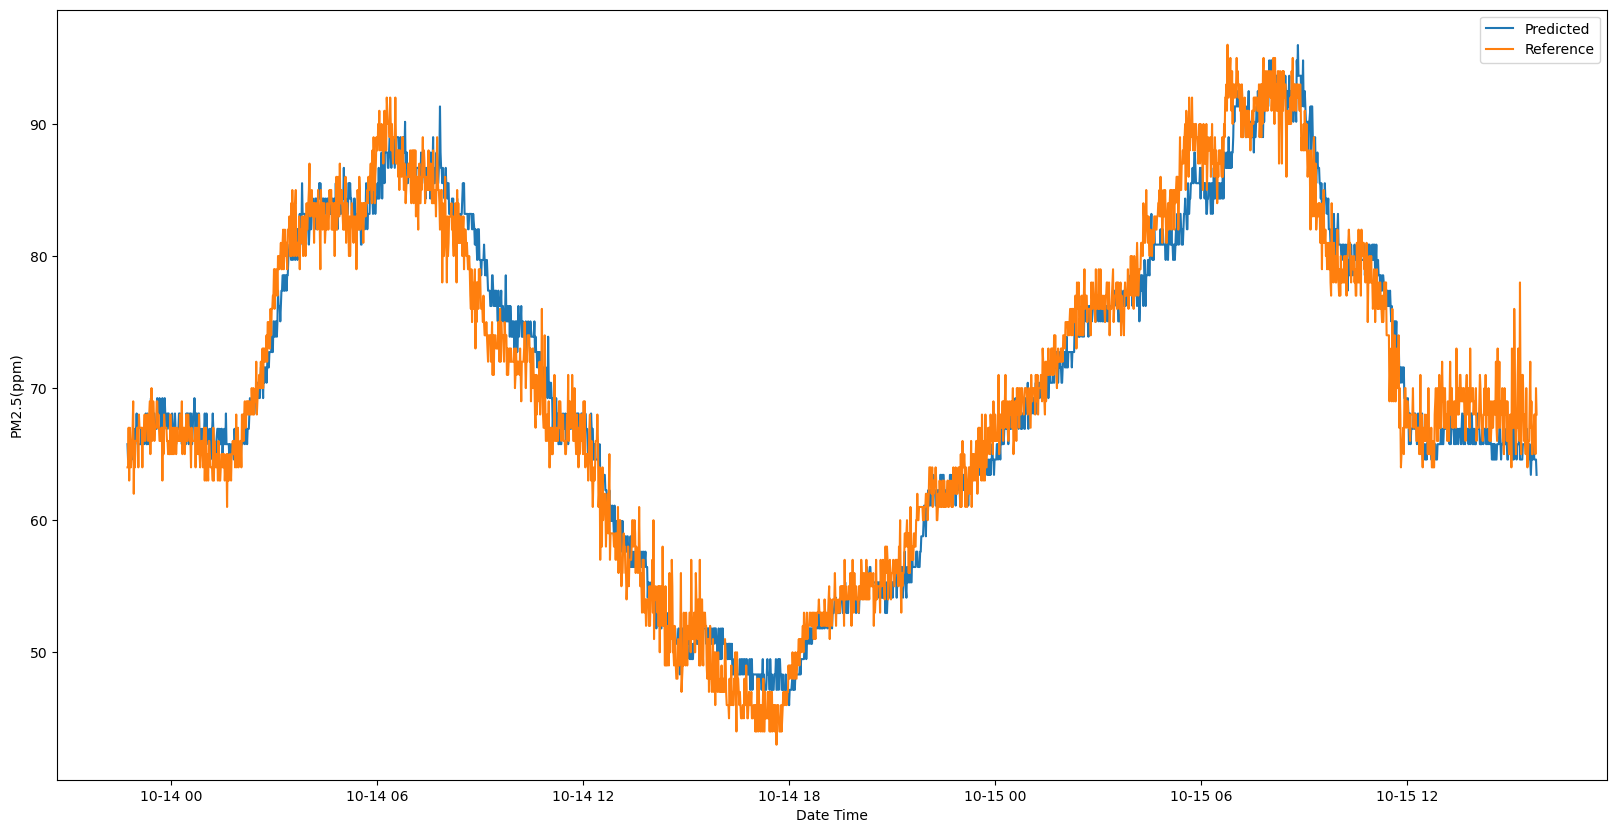

In [9]:
plt.figure(figsize=(20,10))
plt.plot(rawDataSensor2.index, reg.predict(X), label='Predicted')
plt.plot(refData.index, refData[' PM2.5(ppm)'], label='Reference')
plt.xlabel('Date Time')
plt.ylabel('PM2.5(ppm)')
plt.legend()
plt.show()

In [10]:
X = rawDataSensor2['field3'].values.reshape(-1,1)
y = refData[' PM10(ppm)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print("Slope for PM10: ", reg.coef_[0][0])
print("Intercept for PM10: ", reg.intercept_[0])

pm10slope = reg.coef_[0][0]
pm10intercept = reg.intercept_[0]

Slope for PM10:  2.786716898825535
Intercept for PM10:  1.2036852713879114


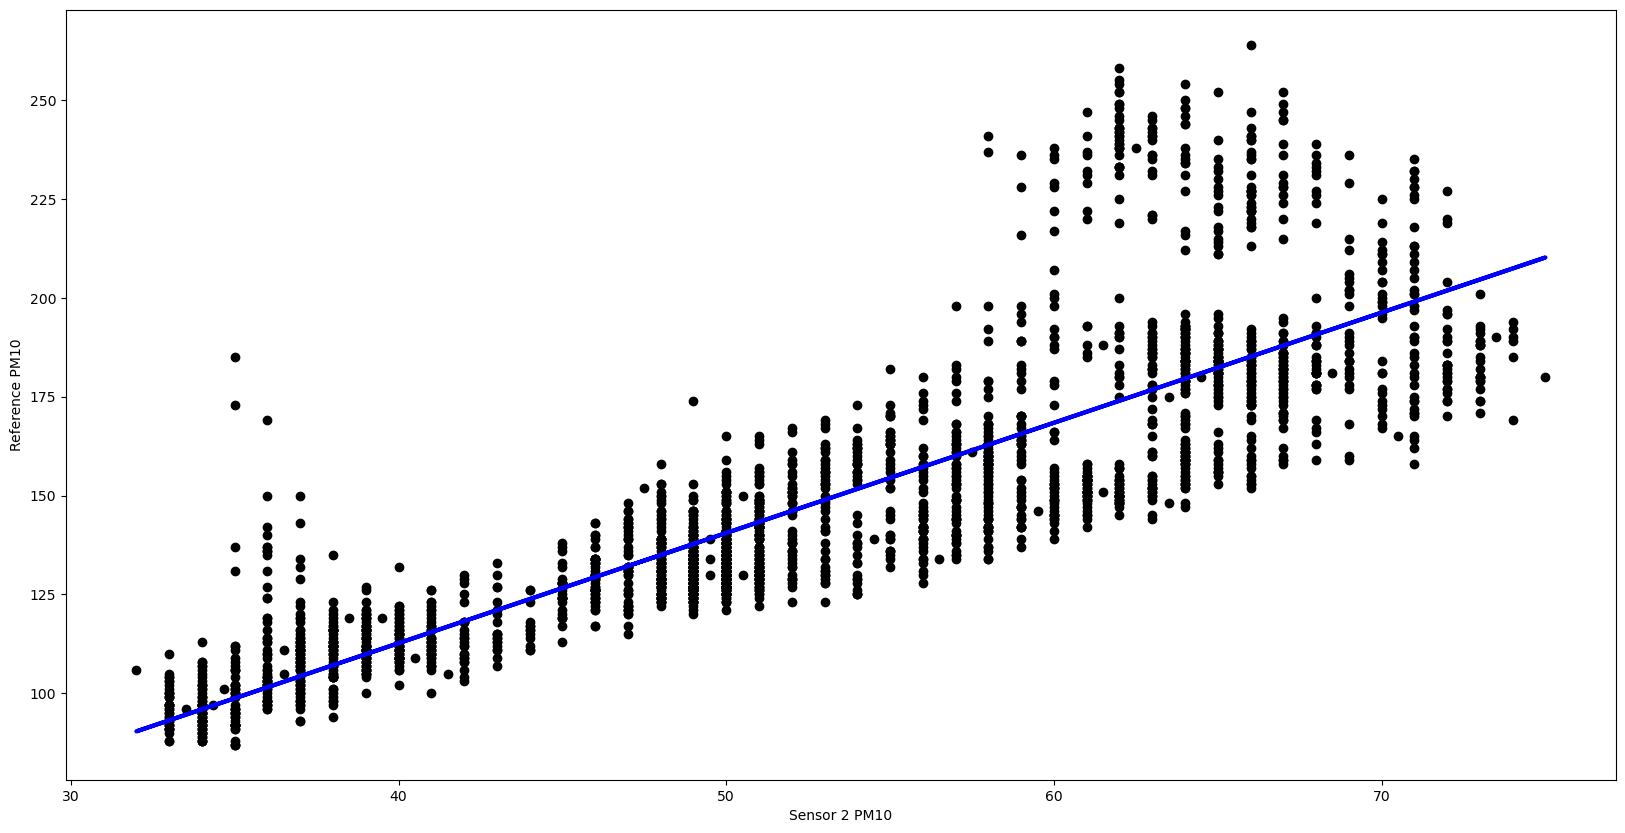

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(X, y,  color='black')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.xlabel('Sensor 2 PM10')
plt.ylabel('Reference PM10')
plt.show()

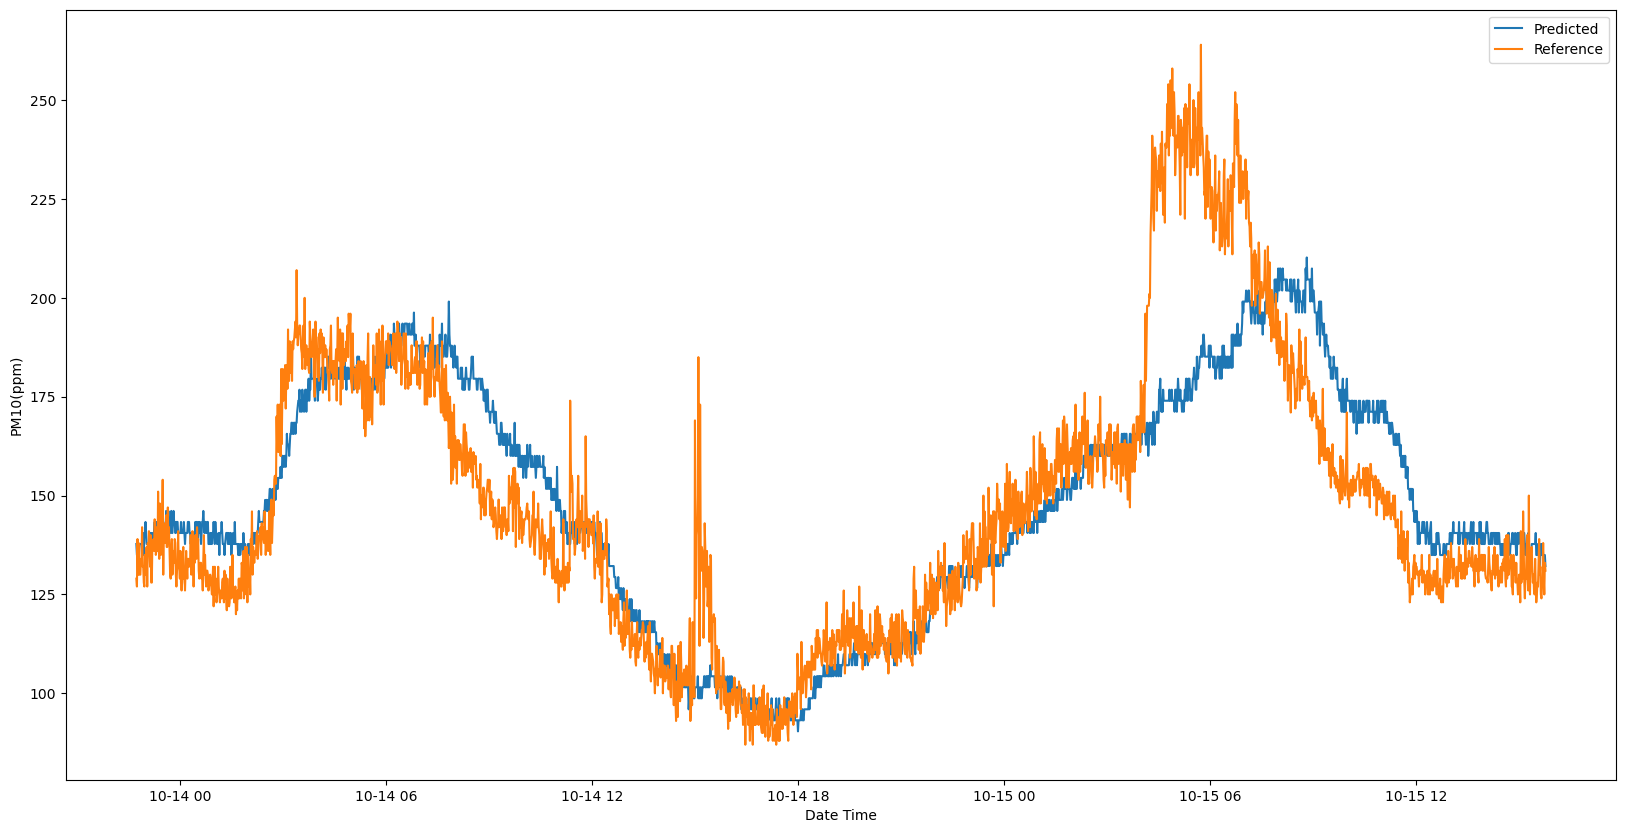

In [12]:
plt.figure(figsize=(20,10))
plt.plot(rawDataSensor2.index, reg.predict(X), label='Predicted')
plt.plot(refData.index, refData[' PM10(ppm)'], label='Reference')
plt.xlabel('Date Time')
plt.ylabel('PM10(ppm)')
plt.legend()
plt.show()

In [13]:
refData = pd.read_csv('feeds_channel_2.csv')
refData['created_at'] = pd.to_datetime(refData['created_at'])
refData = refData.drop(['latitude','longitude','entry_id','elevation','status'], axis=1) 
refData = refData[6989:]
# multiply the field 3  values with pm25slope and add pm25intercept
refData['field3'] = refData['field3']*pm25slope + pm25intercept
# multiply the field 4  values with pm10slope and add pm10intercept
refData['field4'] = refData['field4']*pm10slope + pm10intercept
refData = refData.set_index('created_at')
refData = refData.resample('1T').mean()
print(refData.head())

rawData = pd.read_csv('feeds_channel_1.csv')
rawData = rawData.drop(['latitude','longitude','entry_id','elevation','status'], axis=1) 
rawData['created_at'] = pd.to_datetime(rawData['created_at'])
rawData = rawData[6990:]
rawData = rawData.set_index('created_at')
rawData = rawData.resample('1T').mean()
print(rawData.head())



                              field1    field2     field3      field4
created_at                                                           
2023-11-10 22:54:00+05:30  28.725240  61.30943  68.893724  195.995196
2023-11-10 22:55:00+05:30  28.767780  61.14082  67.905702  184.290986
2023-11-10 22:56:00+05:30  28.825285  61.05499  68.661248  183.454970
2023-11-10 22:57:00+05:30  28.845690  60.77690  68.719367  180.528918
2023-11-10 22:58:00+05:30  28.831675  60.71730  68.370653  179.274895
                            field1    field2     field3     field4
created_at                                                        
2023-11-10 22:55:00+05:30  29.0062  65.29913  44.666667  53.700000
2023-11-10 22:56:00+05:30  29.0062  65.29913  45.133333  58.433333
2023-11-10 22:57:00+05:30  29.0062  65.29913  45.800000  60.250000
2023-11-10 22:58:00+05:30  29.0062  65.29913  44.800000  57.650000
2023-11-10 22:59:00+05:30  29.0062  65.29913  44.166667  53.033333


In [14]:
refData = refData.loc[str(rawData.index[0]):str(rawData.index[-1])]
print(rawData.tail())
print(refData.tail())

rawData.interpolate(method='linear', inplace=True)
refData.interpolate(method='linear', inplace=True)

                              field1     field2     field3     field4
created_at                                                           
2023-11-11 12:35:00+05:30  28.669930  53.978538  31.300000  51.575000
2023-11-11 12:36:00+05:30  28.708077  53.823947  30.366667  51.733333
2023-11-11 12:37:00+05:30  28.738307  53.976775  29.900000  44.825000
2023-11-11 12:38:00+05:30  28.798163  53.754043  29.300000  52.600000
2023-11-11 12:39:00+05:30  28.844025  53.073478  30.525000  46.225000
                              field1     field2     field3      field4
created_at                                                            
2023-11-11 12:35:00+05:30  28.689190  51.730685  48.552093  135.384104
2023-11-11 12:36:00+05:30  28.705500  51.766490  49.423878  143.326247
2023-11-11 12:37:00+05:30  28.721140  52.007005  48.029023  139.006836
2023-11-11 12:38:00+05:30  28.796765  51.694105  47.564071  130.646685
2023-11-11 12:39:00+05:30  28.830525  51.104545  49.133283  135.941447


In [15]:
# field 3 = PM2.5
# field 4 = PM10

# Calibration for PM2.5
X = rawData['field3'].values.reshape(-1,1)
y = refData['field3'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print("Slope for PM2.5: ", reg.coef_[0][0])
print("Intercept for PM2.5: ", reg.intercept_[0])



Slope for PM2.5:  1.3586309233786342
Intercept for PM2.5:  8.986988938804878


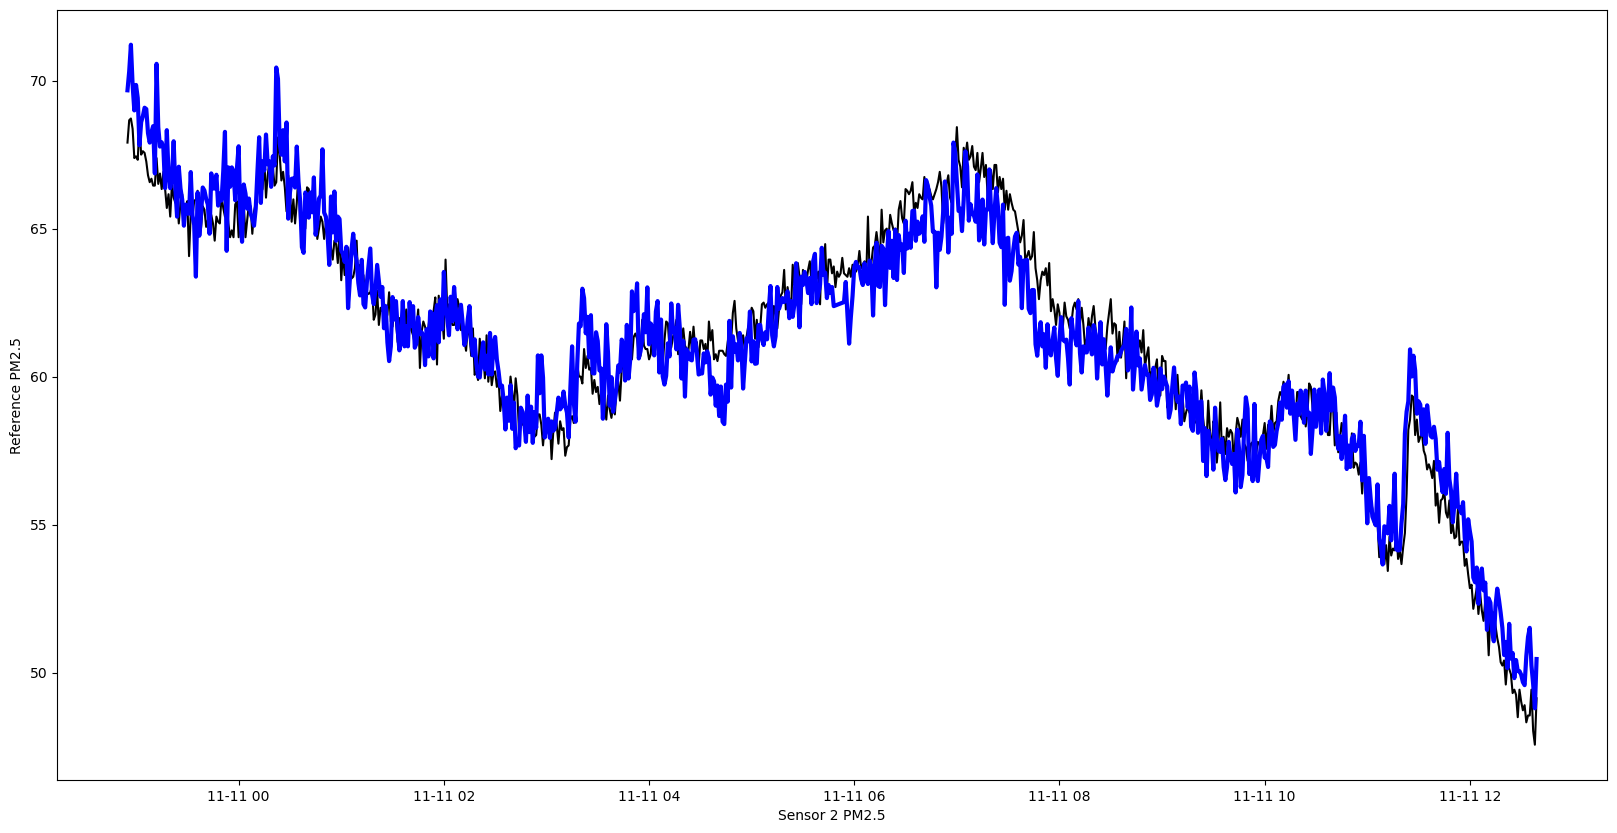

In [16]:
# Plot the calibrated data
plt.figure(figsize=(20,10))
plt.plot(refData.index, refData['field3'],  color='black')
plt.plot(rawData.index, reg.predict(X), color='blue', linewidth=3)
plt.xlabel('Sensor 2 PM2.5')
plt.ylabel('Reference PM2.5')
plt. 
plt.show()

In [17]:
# Calibration for PM10
X = rawData['field4'].values.reshape(-1,1)
y = refData['field4'].values.reshape(-1,1)

reg = LinearRegression()

reg.fit(X, y)

print("Slope for PM10: ", reg.coef_[0][0])
print("Intercept for PM10: ", reg.intercept_[0])


Slope for PM10:  1.7734262357652464
Intercept for PM10:  70.12370821420492
